In [2]:
import numpy as np
from scipy import signal
from scipy.signal import lfilter
import matplotlib.pyplot as plt

Taps:
[ 1020.   989.   928.   839.   724.   587.   433.   265.    89.   -89.
  -265.  -433.  -587.  -724.  -839.  -928.  -989. -1020. -1020.  -989.
  -928.  -839.  -724.  -587.  -433.  -265.   -89.    89.   265.   433.
   587.   724.   839.   928.   989.  1020.]


Text(0.5, 1.0, '36-Tap Cosine FIR Filter Taps')

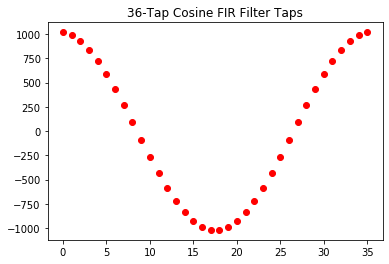

In [3]:
sampling_frequency = 2160
samples_per_cycle = sampling_frequency / 60
t = np.arange(2 * np.pi / (2 * samples_per_cycle), 2 * np.pi, 2 * np.pi / samples_per_cycle)
taps = np.round(np.cos(t) * 1024)
print('Taps:')
print(taps)
plt.plot(taps, 'ro')
plt.title('36-Tap Cosine FIR Filter Taps')

60Hz Gain: 18430.854875558


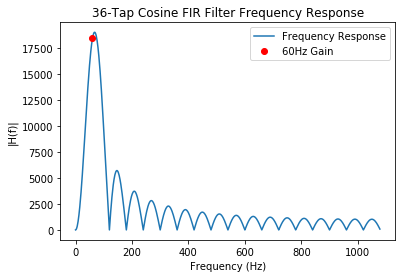

In [4]:
w, h = signal.freqz(taps, [1], worN = 720, fs=2*np.pi*sampling_frequency)
f = w / (2 * np.pi)
response = {}
for A, B in zip(f, h):
    response[A] = B
plt.plot(f, abs(h))
plt.plot(59.99999999999999, abs(response[59.99999999999999]), 'ro')
plt.title('36-Tap Cosine FIR Filter Frequency Response')
plt.legend(('Frequency Response', '60Hz Gain'))
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H(f)|')
print('60Hz Gain: ' + str(abs(response[59.99999999999999])))

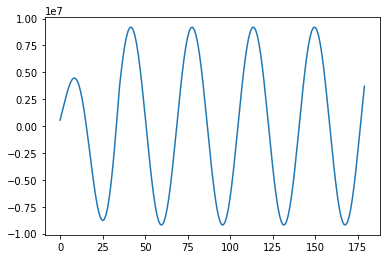

In [8]:
t = np.arange(0, 10 * np.pi, 2 * np.pi / samples_per_cycle)
signal = np.round(np.sin(t + 0.5) * 500) + 300
filter_output = lfilter(taps, [1], signal)
plt.plot(filter_output)